<a href="https://colab.research.google.com/github/RohanRanshinge/Image_classification/blob/master/ML_Project_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using CNN 

![Cover Image Dog vs cat](https://docs.google.com/uc?export=download&id=14G5jrMhTihPcK5SVQ7m65ytKIF_QFdUL)

# The Problem

![Google](https://docs.google.com/uc?export=download&id=1ZoYYrdIG7rP0kpRl5l7P2fj4rJXdckOV) ![Ashish_and_Rohan](https://docs.google.com/uc?export=download&id=1bEYWOAfqU3dPj0404c87fHsD_tbhHBnR) 

###  Importing the required libraries

In [0]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt
from IPython.display import Image

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
import sys

Using TensorFlow backend.


In [0]:
GOOGLE_COLAB = True
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
TEST_FILE = "test_file.txt"
MODEL_FILE = "model.h5"

In [0]:
if GOOGLE_COLAB:
    !pip -q install livelossplot
from livelossplot import PlotLossesKeras


## Ingestion

### Setting up colab connection with Google drive

In [0]:
# Data
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/', force_remount=True)
    path = "/content/drive/My Drive/Colab Notebooks/Image_Classifier/"
training_data_dir = path + "data/training" 
validation_data_dir = path + "data/validation" 
test_data_dir = path + "data/test1"

Mounted at /content/drive/


In [0]:
#test_data_dir

## CNN

In [0]:
# Hyperparams
IMAGE_SIZE = 200
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20 # means that the complete training set (all of the samples) will be passed to the model a total of 20 times
BATCH_SIZE = 25  # specifies how many training samples should be sent to the model at once.
TEST_SIZE = 10

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

![CNN](https://docs.google.com/uc?export=download&id=1fhvY7bs7__b2bbcwo8ORZRNF97j7SHil)

**Model**

In [0]:
# Model
model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling reduces the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer. 

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
    
model.compile(loss='binary_crossentropy', # loss function
            optimizer=RMSprop(lr=0.0001), # learning rate
            metrics=['accuracy'])

with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 

In [0]:
# Data augmentation
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [0]:
# Data preparation
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=True)

Found 1598 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 100 images belonging to 1 classes.


**Training**

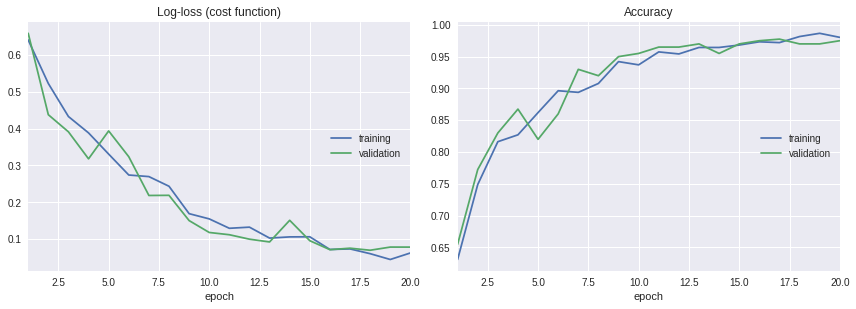

Log-loss (cost function):
training   (min:    0.045, max:    0.641, cur:    0.063)
validation (min:    0.070, max:    0.659, cur:    0.079)

Accuracy:
training   (min:    0.631, max:    0.987, cur:    0.980)
validation (min:    0.655, max:    0.977, cur:    0.975)


In [0]:
# Training
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    callbacks=[PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)
model.save_weights(MODEL_FILE)

**Testing**

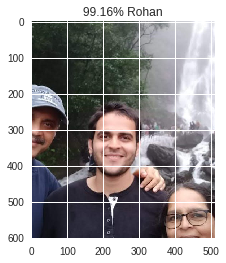

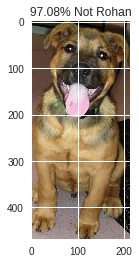

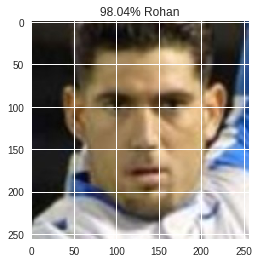

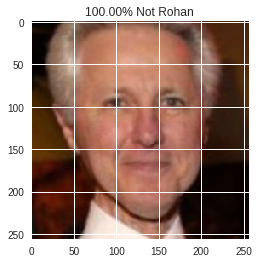

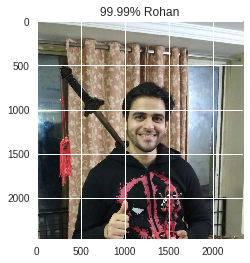

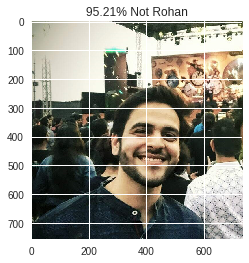

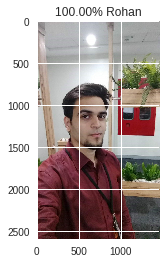

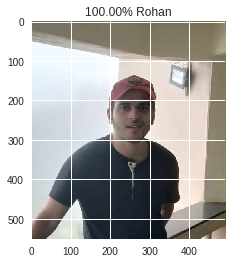

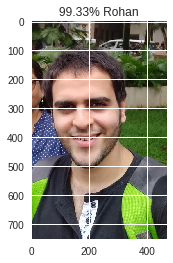

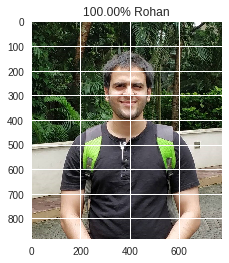

In [0]:
# Testing
open(TEST_FILE,"w")
probabilities = model.predict_generator(test_generator, TEST_SIZE)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    with open(TEST_FILE,"a") as fh:
        fh.write(str(probability[0]) + " for: " + image_path + "\n")
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Rohan")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% Not Rohan")
    plt.show()

#if GOOGLE_COLAB:
 #   files.download(MODEL_SUMMARY_FILE)
  #  files.download(MODEL_FILE)
   # files.download(TRAINING_LOGS_FILE)
#    files.download(TEST_FILE)


## Next Steps
* Use images of Ashish to test and see how good this model is
* Use multilclass classification to identify images where Ashish and I are both present in the same images